In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def load_img():
    blank_img=np.zeros((600,600))
    font =cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text="ABCDE",org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

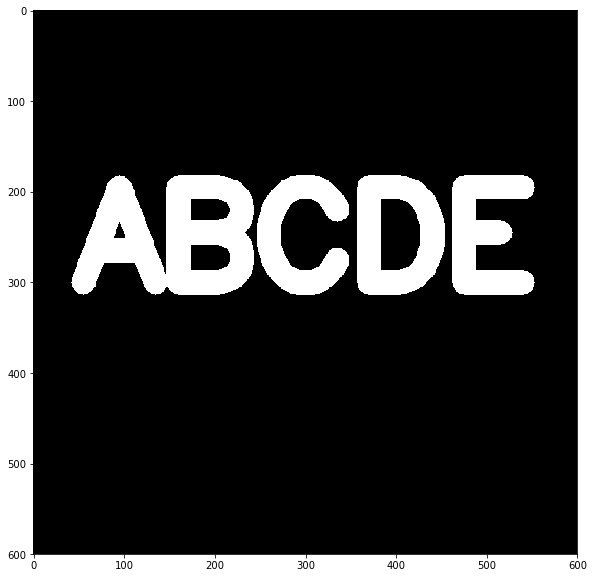

In [4]:
img=load_img()
display_img(img)

In [5]:
kernel=np.ones(shape=(5,5),dtype=np.int8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [6]:
result=cv2.erode(img,kernel,iterations=1)
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

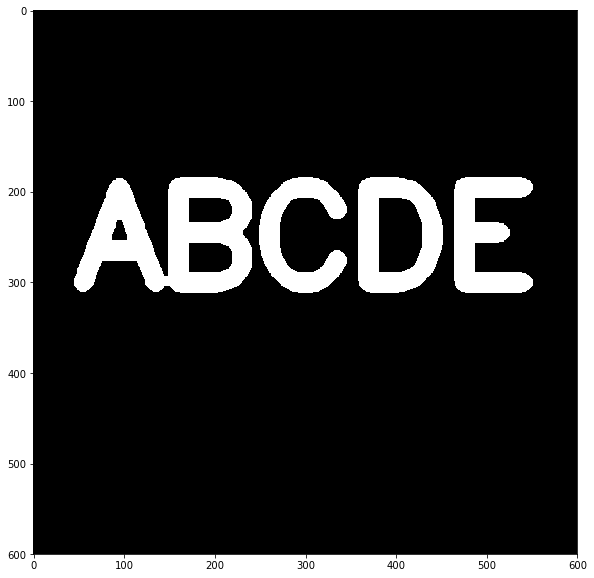

In [7]:
display_img(result)

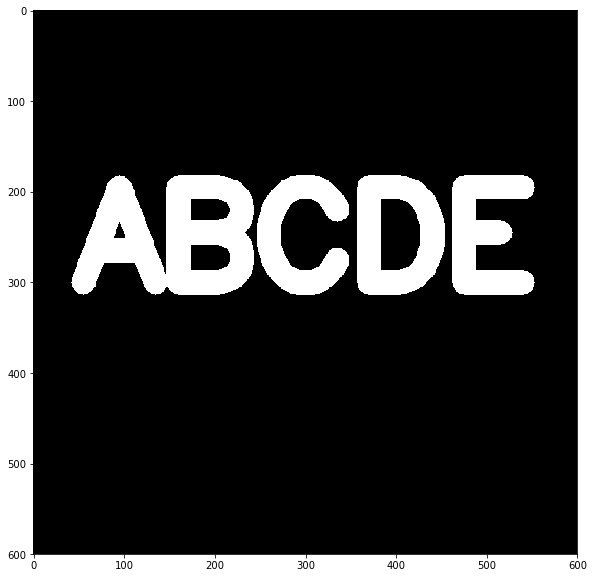

In [8]:
img=load_img()
display_img(img)

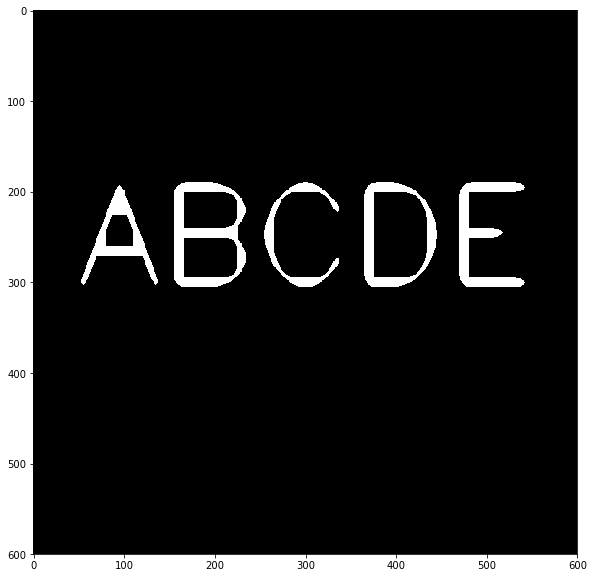

In [9]:
#just play with kernel size for required results
#increasing the no. of iterations increases the erosion


result=cv2.erode(img,kernel,iterations=4)
display_img(result)

In [10]:
kernel=np.ones(shape=(7,7),dtype=np.int8)
kernel

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]], dtype=int8)

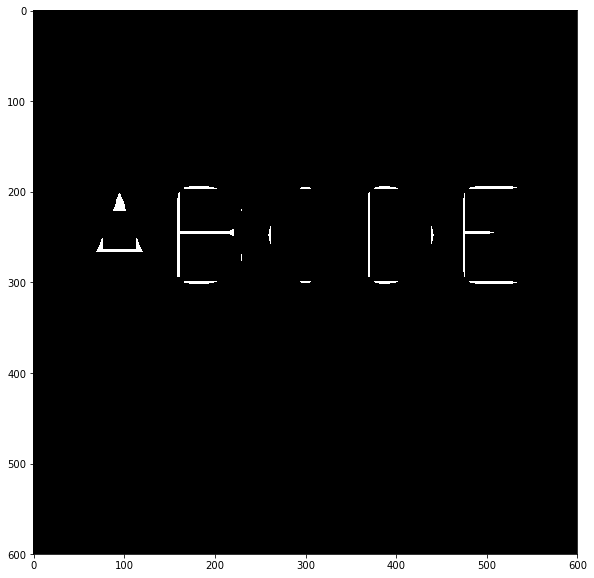

In [26]:
result=cv2.erode(img,kernel,iterations=3)
display_img(result)

In [27]:
#Opening is the erosion followed by dilation

#dilation is opposite to erosion which means adding more to foreground
#opening is helpful in removing background noise

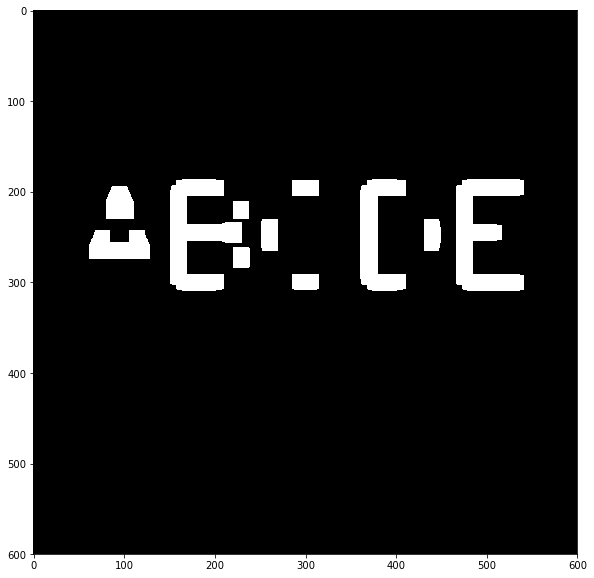

In [32]:
dilate=cv2.dilate(result,kernel,iterations=1
                 )
display_img(dilate)

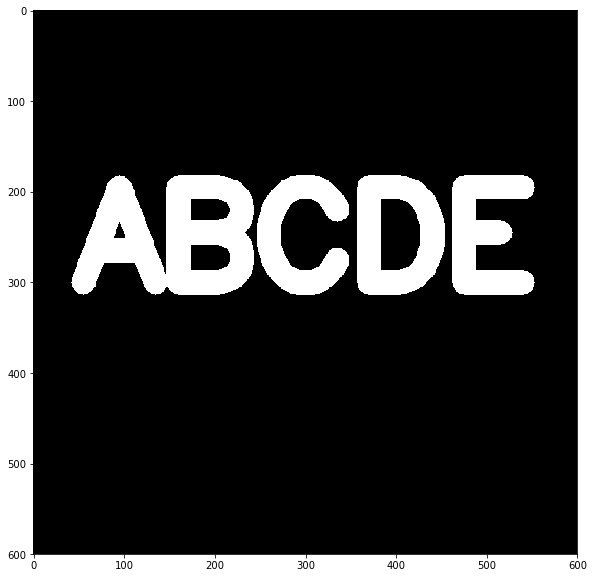

In [14]:
img=load_img()
display_img(img)

In [15]:
white_noise=np.random.randint(low=0,high=2,size=(600,600))
white_noise.max()

1

In [16]:
img.max()

255.0

In [17]:
white_noise=white_noise*255
white_noise.max()

255

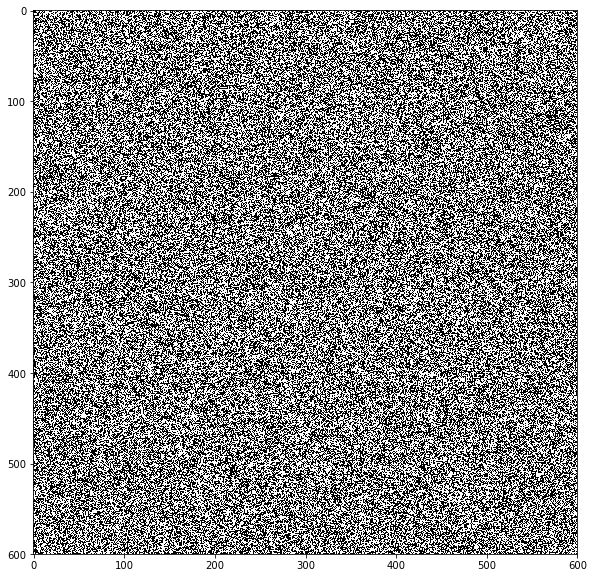

In [18]:
display_img(white_noise)

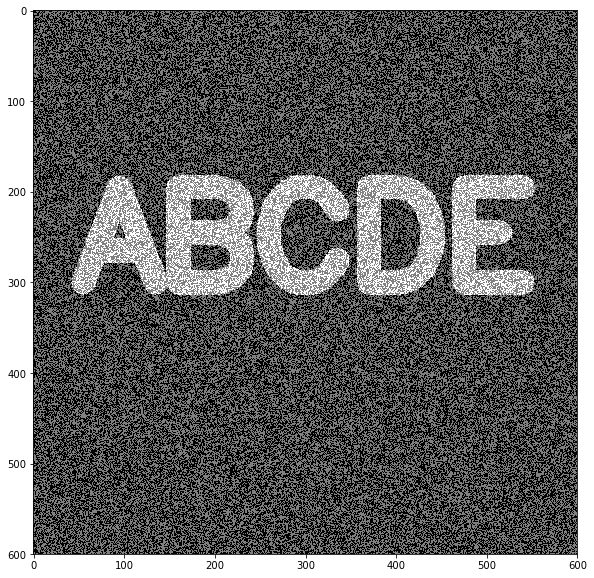

In [19]:
noise_img=img+white_noise
display_img(noise_img)

In [20]:
result_opening=cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)


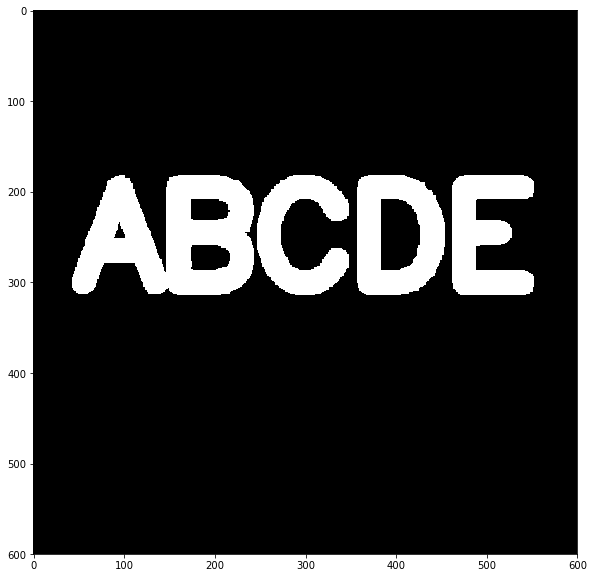

In [21]:
display_img(result_opening)

In [22]:
kernel=np.ones(shape=(9,9),dtype=np.int8)*255

In [23]:
result=cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel,iterations=2)


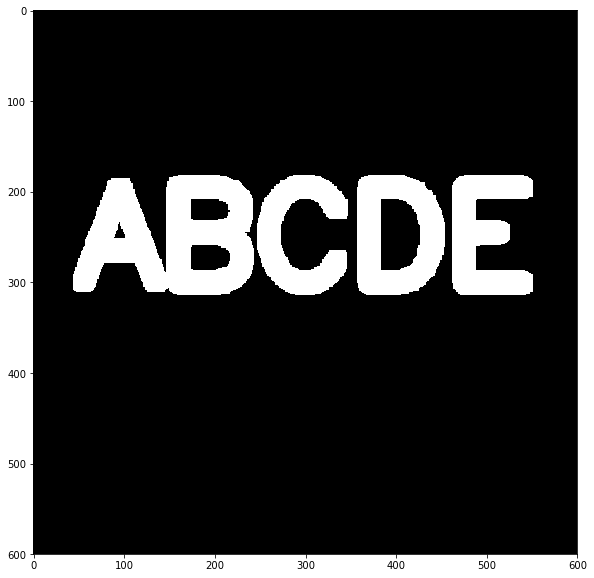

In [24]:
display_img(result)

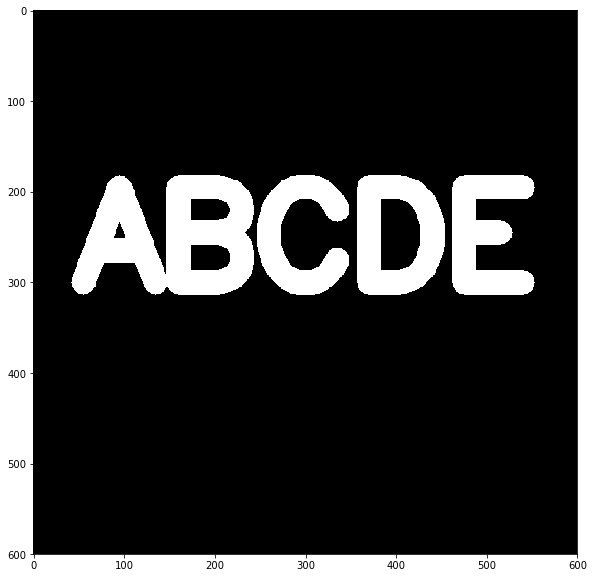

In [25]:
display_img(img)

In [88]:
#Image with foreground noise

In [36]:
black_noise=np.ones(shape=(600,600),dtype=np.int8)

In [37]:
black_noise=np.random.randint(low=0,high=2,size=(600,600))* -255

In [38]:
black_noise

array([[   0,    0, -255, ...,    0, -255,    0],
       [   0,    0,    0, ...,    0, -255, -255],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [-255,    0, -255, ...,    0,    0,    0],
       [   0, -255, -255, ...,    0, -255, -255],
       [   0, -255, -255, ...,    0, -255,    0]])

In [39]:
black_noise_img=black_noise+img

In [40]:
black_noise_img

array([[   0.,    0., -255., ...,    0., -255.,    0.],
       [   0.,    0.,    0., ...,    0., -255., -255.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [-255.,    0., -255., ...,    0.,    0.,    0.],
       [   0., -255., -255., ...,    0., -255., -255.],
       [   0., -255., -255., ...,    0., -255.,    0.]])

In [41]:
black_noise_img[black_noise_img == -255] = 0 
black_noise_img.min()

0.0

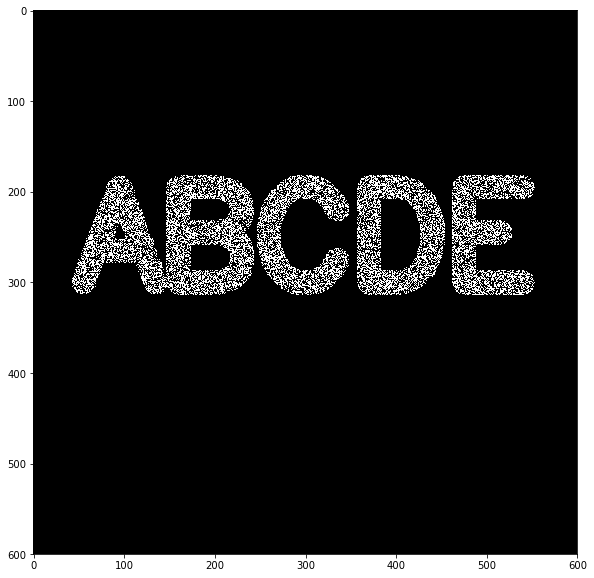

In [42]:
display_img(black_noise_img)

In [43]:
#Removing noise from foreground

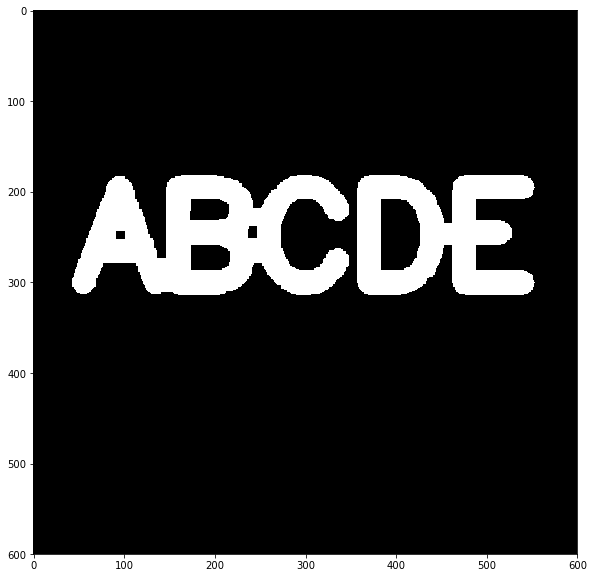

In [44]:
closing=cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

In [45]:
kernel=np.ones(shape=(7,7),dtype=np.int8)

In [48]:
closing_2=cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel,iterations=3)

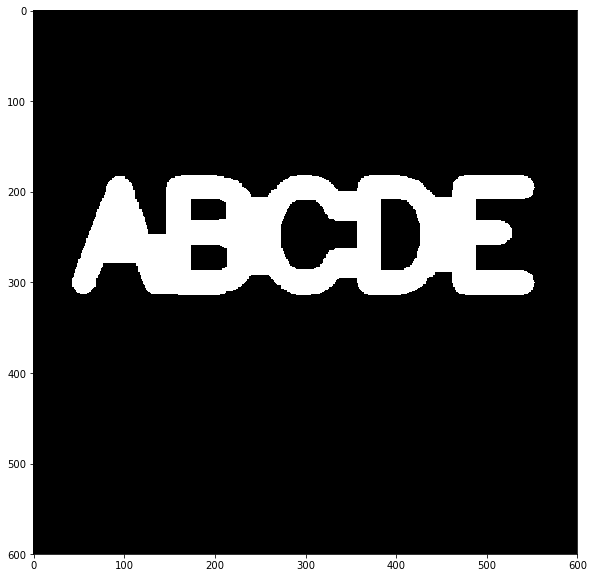

In [49]:
display_img(closing_2)

In [50]:
#Morphological Gradient - difference of dilation and erosion

#kind of the method of edge detection

In [51]:
kernel=np.ones(shape=(7,7),dtype=np.int8)

In [52]:
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

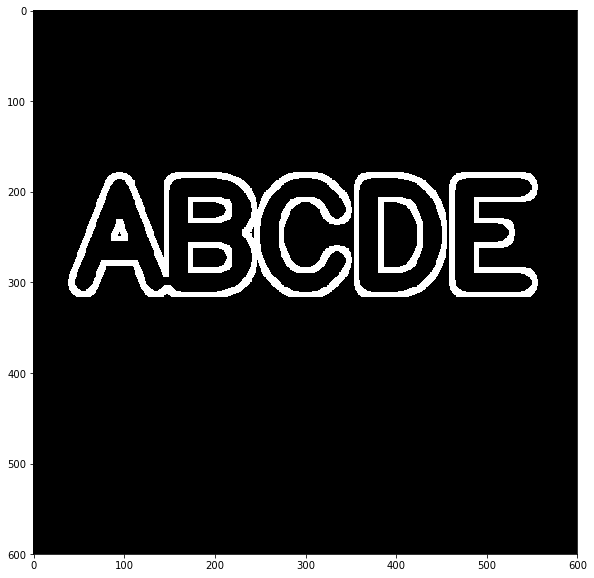

In [53]:
display_img(gradient)

In [54]:
kernel=np.ones(shape=(7,7),dtype=np.int8)

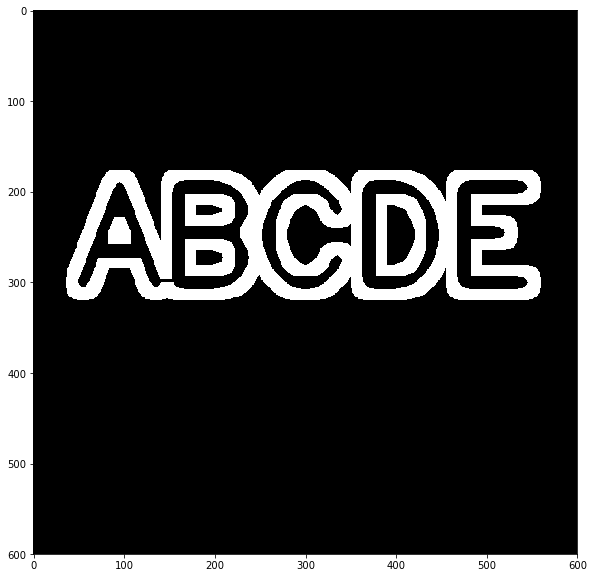

In [55]:
gradient_2=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel,iterations=2)
display_img(gradient_2)